In [14]:
# 📦 Import librerie
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import shap
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.impute import SimpleImputer

# 📥 Caricamento del dataset
df = pd.read_parquet("../data/processed/RM_Dimessi_clean.parquet")

# 🧮 Calcolo Barthel ingresso e dimissione
barthel_ingresso_cols = [f'bartric{i}' for i in range(1, 12)]
barthel_dimissione_cols = [f'bartdim{i}' for i in range(1, 12)]

df["barthel_totale_ingresso"] = df[barthel_ingresso_cols].sum(axis=1)
df["barthel_totale_dimissione"] = df[barthel_dimissione_cols].sum(axis=1)
df["delta_barthel"] = df["barthel_totale_dimissione"] - df["barthel_totale_ingresso"]

# 🧼 Filtra casi validi
df = df.dropna(subset=["delta_barthel"])
df = df[(df["delta_barthel"] > -50) & (df["delta_barthel"] < 100)]
df = df[df["degenza"] < 180]

# 👤 Categorizzazione età
def età_clinica(età):
    if età < 65:
        return "adulto"
    elif età < 80:
        return "anziano"
    else:
        return "grande_anziano"

df["età_clinica"] = df["età del paziente dimesso"].apply(età_clinica)

# 🧠 Selezione feature
feature_cols = [
    "degenza",
    "barthel_totale_ingresso",
    "età_clinica",
    "totale_drsric", "gosric", "lcfric", "totale_scimric",
    "locomric", "respirric", "contrsfinric", "nutrric", "trachric", "postcomric", "mieloric",
    "ASIAric", "tipdim",
    "intproc1", "intproc2", "intproc3", "intproc4", "intproc5",
    "intproc6", "intproc7", "intproc8", "intproc9", "intproc10"
]

X = df[feature_cols].copy()
y = df["delta_barthel"]

# 🔍 Separazione numeriche e categoriche
num_cols = X.select_dtypes(include=["number"]).columns
num_cols_valid = [col for col in num_cols if X[col].notna().sum() > 0]
cat_cols = X.select_dtypes(include=["object", "category", "bool"]).columns

# 🔧 Imputazione
imputer_num = SimpleImputer(strategy="median")
X_num_imputed = pd.DataFrame(imputer_num.fit_transform(X[num_cols_valid]), columns=num_cols_valid, index=X.index)

imputer_cat = SimpleImputer(strategy="constant", fill_value="missing")
X_cat_imputed = pd.DataFrame(imputer_cat.fit_transform(X[cat_cols]), columns=cat_cols, index=X.index)

# 🔁 Merge e encoding
X = pd.concat([X_num_imputed, X_cat_imputed], axis=1)
X = pd.get_dummies(X, drop_first=True)

# ✂️ Allinea y
y = y.loc[X.index]

# 🔀 Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 🚀 Training del modello
model = XGBRegressor(
    n_estimators=300,
    max_depth=6,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)
model.fit(X_train, y_train)

# 📊 Valutazione
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"🎯 R²: {r2:.3f} | MAE: {mae:.2f}")

🎯 R²: 0.838 | MAE: 7.37


🎯 R²: 0.838 | MAE: 7.37
💡 Calcolo dei valori SHAP in corso...


 99%|===================| 4079/4115 [00:23<00:00]        

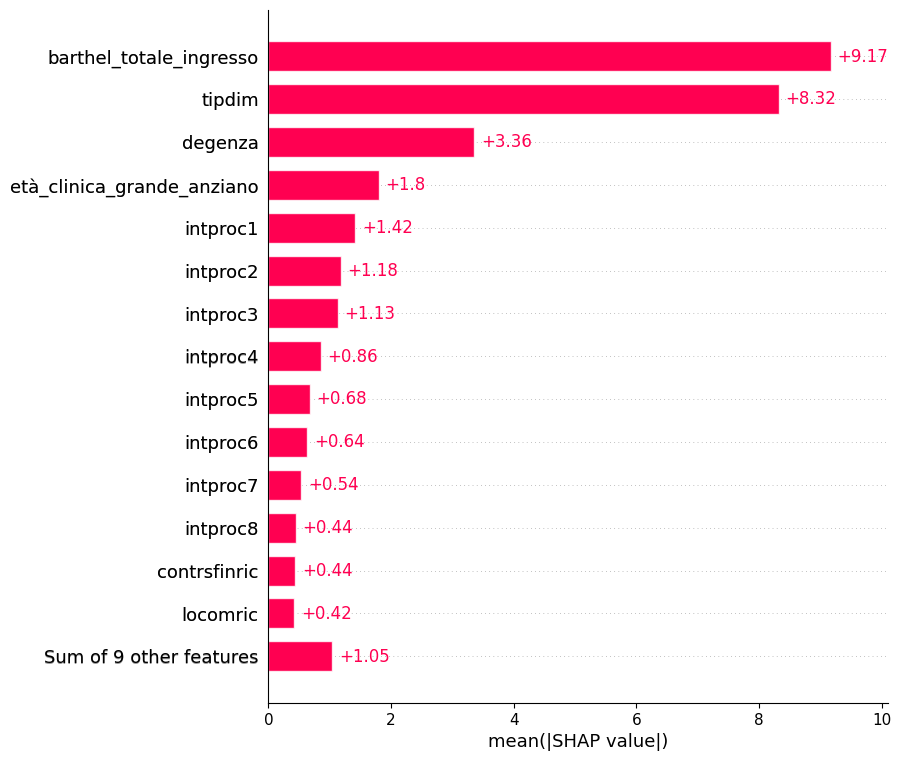

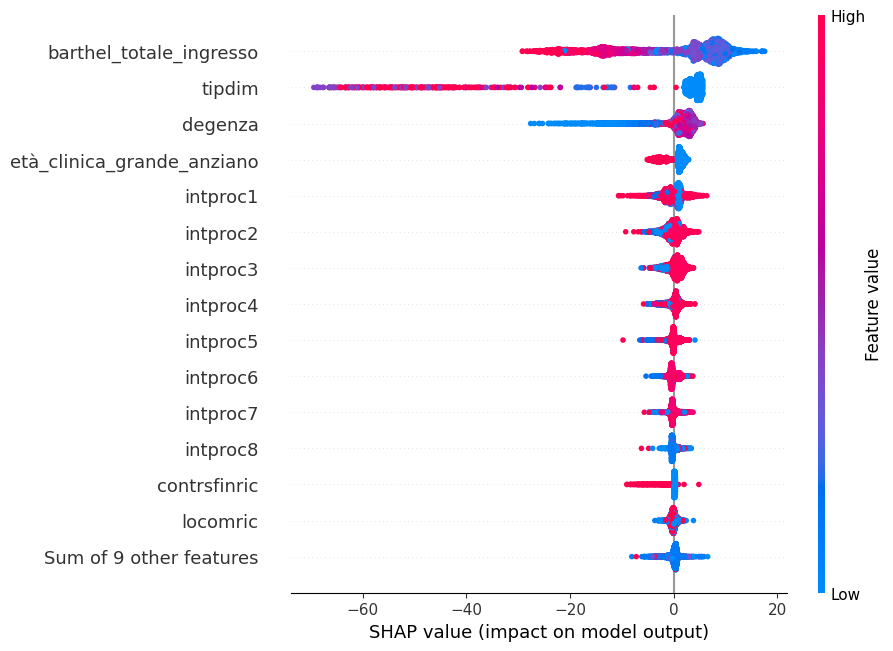

In [ ]:
# 📦 Import librerie
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import shap
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.impute import SimpleImputer

# 📥 Caricamento del dataset
df = pd.read_parquet("../data/processed/RM_Dimessi_clean.parquet")

# 🧮 Calcolo Barthel ingresso e dimissione
barthel_ingresso_cols = [f'bartric{i}' for i in range(1, 12)]
barthel_dimissione_cols = [f'bartdim{i}' for i in range(1, 12)]

df["barthel_totale_ingresso"] = df[barthel_ingresso_cols].sum(axis=1)
df["barthel_totale_dimissione"] = df[barthel_dimissione_cols].sum(axis=1)
df["delta_barthel"] = df["barthel_totale_dimissione"] - df["barthel_totale_ingresso"]

# 🧼 Filtra casi validi
df = df.dropna(subset=["delta_barthel"])
df = df[(df["delta_barthel"] > -50) & (df["delta_barthel"] < 100)]
df = df[df["degenza"] < 180]

# 👤 Categorizzazione età
def età_clinica(età):
    if età < 65:
        return "adulto"
    elif età < 80:
        return "anziano"
    else:
        return "grande_anziano"

df["età_clinica"] = df["età del paziente dimesso"].apply(età_clinica)

# 🧠 Selezione feature
feature_cols = [
    "degenza",
    "barthel_totale_ingresso",
    "età_clinica",
    "totale_drsric", "gosric", "lcfric", "totale_scimric",
    "locomric", "respirric", "contrsfinric", "nutrric", "trachric", "postcomric", "mieloric",
    "ASIAric", "tipdim",
    "intproc1", "intproc2", "intproc3", "intproc4", "intproc5",
    "intproc6", "intproc7", "intproc8", "intproc9", "intproc10"
]

X = df[feature_cols].copy()
y = df["delta_barthel"]

# 🔍 Separazione numeriche e categoriche
num_cols = X.select_dtypes(include=["number"]).columns
num_cols_valid = [col for col in num_cols if X[col].notna().sum() > 0]
cat_cols = X.select_dtypes(include=["object", "category", "bool"]).columns

# 🔧 Imputazione
imputer_num = SimpleImputer(strategy="median")
X_num_imputed = pd.DataFrame(imputer_num.fit_transform(X[num_cols_valid]), columns=num_cols_valid, index=X.index)

imputer_cat = SimpleImputer(strategy="constant", fill_value="missing")
X_cat_imputed = pd.DataFrame(imputer_cat.fit_transform(X[cat_cols]), columns=cat_cols, index=X.index)

# 🔁 Merge e encoding
X = pd.concat([X_num_imputed, X_cat_imputed], axis=1)
X = pd.get_dummies(X, drop_first=True)

# ✂️ Allinea y
y = y.loc[X.index]

# 🔀 Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 🚀 Training del modello
model = XGBRegressor(
    n_estimators=300,
    max_depth=6,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)
model.fit(X_train, y_train)

# 📊 Valutazione
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"🎯 R²: {r2:.3f} | MAE: {mae:.2f}")

# 📈 SHAP summary & beeswarm plot
print("💡 Calcolo dei valori SHAP in corso...")
explainer = shap.Explainer(model, X_train.astype(float))
shap_values = explainer(X_test.astype(float))

# Summary plot (bar plot delle feature importance)
shap.plots.bar(shap_values, max_display=15)

# Beeswarm plot (pattern individuali + distribuzioni)
shap.plots.beeswarm(shap_values, max_display=15)

🔍 Commento al Summary Plot (importanza media SHAP)
<img src="attachment:file-USXCiYhvToijdgrS76hhe3" width="400"/>
Le feature più impattanti sono:

🥇 barthel_totale_ingresso (+9.17)
La feature più predittiva del delta di Barthel.

Valori bassi all’ingresso corrispondono a più spazio per migliorare, e quindi un delta maggiore.

🥈 tipdim (+8.32)
Probabilmente codifica esiti differenti: migliorano di più quelli dimessi a domicilio rispetto a quelli deceduti, trasferiti o in cure palliative.

Da tenere in grande considerazione: può diventare anche variabile target per altri studi.

🥉 degenza (+3.36)
Coerente: una maggiore durata consente un trattamento più lungo → impatto maggiore sul miglioramento.

🔹 età_clinica_grande_anziano (+1.8)
Interessante: età molto avanzata predice un minor miglioramento (valori SHAP più negativi nel beeswarm).

Ha senso: minor plasticità, maggiore fragilità, multimorbidità.

🧬 Commento al Beeswarm Plot
<img src="attachment:file-XiKJzujdUzZkLTtz5xYGqU" width="400"/>
📈 barthel_totale_ingresso
Quando è basso (blu) → SHAP > 0 → grande potenziale di miglioramento

Quando è alto (rosa) → SHAP < 0 → poco spazio per migliorare

Effetto soglia netto ben visibile, ottimo candidato per rule-based screening

🧾 tipdim
Dimissioni “standard” (valori più alti?) hanno impatti positivi.

Dimissioni “complesse” (es. ospedalizzazione, morte) hanno impatti negativi → utile per classificazione clinica.

⌛ degenza
Più lunga = effetto positivo ma non sempre lineare.

Da investigare con shap.plots.scatter per vedere se c’è un plateau oltre i 60–90 giorni.

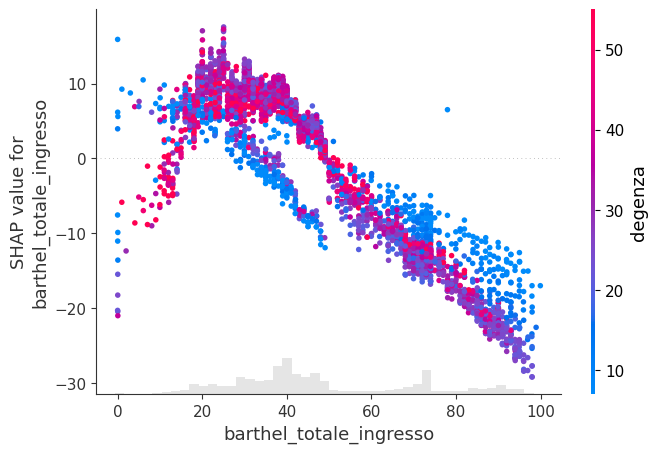

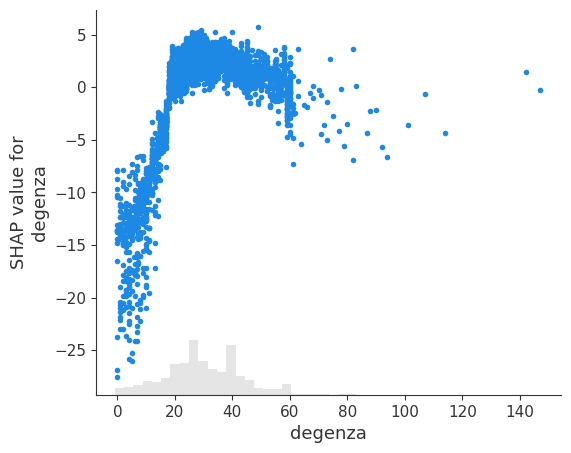

In [18]:
shap.plots.scatter(shap_values[:, "barthel_totale_ingresso"], color=shap_values[:, "degenza"])
shap.plots.scatter(shap_values[:, "degenza"])

🔍 Cosa comunica il plot?
📈 1. Inversione dell’effetto attorno a 30–35
Per barthel_totale_ingresso < 30, l’effetto SHAP è positivo: c’è ampio margine di recupero.

Per valori > 35–40, il contributo diventa negativo: il paziente ha poco margine di miglioramento → delta ridotto.

Questo conferma una non linearità forte → ben catturata da XGBoost.

🌈 2. Ruolo di degenza
A parità di barthel_ingresso, i pazienti con degenza più lunga (rosa/rosso) tendono ad avere impatti SHAP più alti → miglioramento maggiore.

Soprattutto nella fascia 10–30 di Barthel.

🔥 3. Cluster interpretabili
Pazienti con barthel < 25 e degenza > 30 = maggior potenziale riabilitativo.

Pazienti con barthel > 60 = miglioramento molto ridotto, indipendentemente dalla degenza.

/var/folders/qp/ffk__r314v1g0597vzpyysdw0000gn/T/ipykernel_67890/1411118879.py:30: UserWarning: Glyph 128270 (\N{RIGHT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/dantetrabassi/Desktop/rehab-intelligence/.venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128270 (\N{RIGHT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


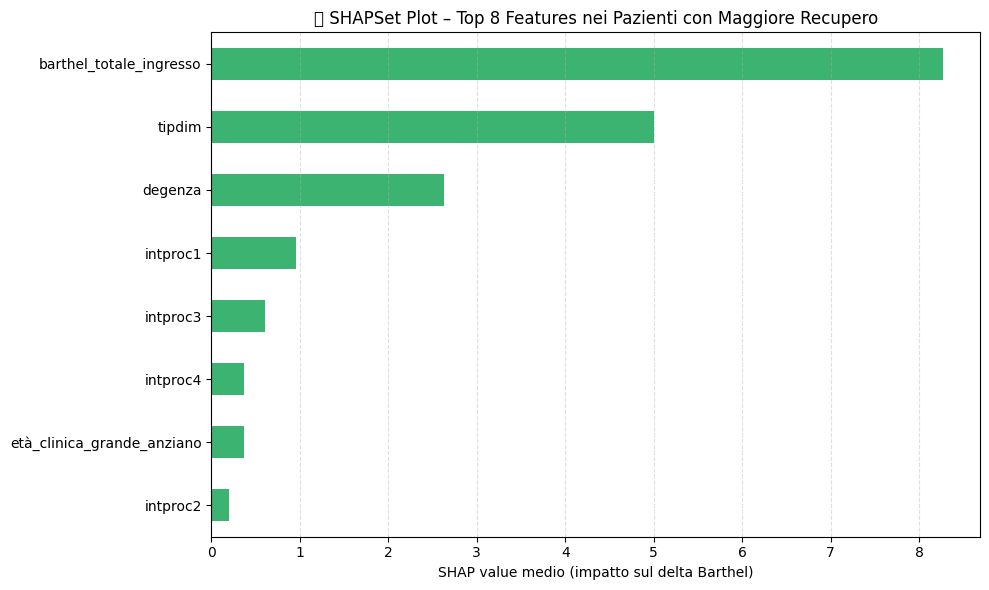

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Crea il DataFrame dei valori SHAP
shap_df = pd.DataFrame(shap_values.values, columns=X_test.columns, index=X_test.index)

# 2. Calcola media assoluta SHAP
shap_mean_abs = shap_df.abs().mean().sort_values(ascending=False)

# 3. Seleziona le top 8 features
top8_features = shap_mean_abs.head(8).index.tolist()
shap_top = shap_df[top8_features]

# 4. Allinea y_test agli indici di shap_top
y_aligned = y_test.loc[shap_top.index]

# 5. Seleziona i pazienti "miglioratori" (top 25%)
cutoff = y_aligned.quantile(0.75)
top_improvers_idx = y_aligned[y_aligned > cutoff].index

# 6. Filtra SHAP values solo per questi soggetti
shap_top_improvers = shap_top.loc[top_improvers_idx]

# 7. SHAPSet Plot
plt.figure(figsize=(10, 6))
shap_top_improvers.mean().sort_values().plot(kind='barh', color='mediumseagreen')
plt.xlabel("SHAP value medio (impatto sul delta Barthel)")
plt.title("🔎 SHAPSet Plot – Top 8 Features nei Pazienti con Maggiore Recupero")
plt.grid(axis='x', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

📏 MSE: 112.9265346233918
📈 R²: 0.83040032793503


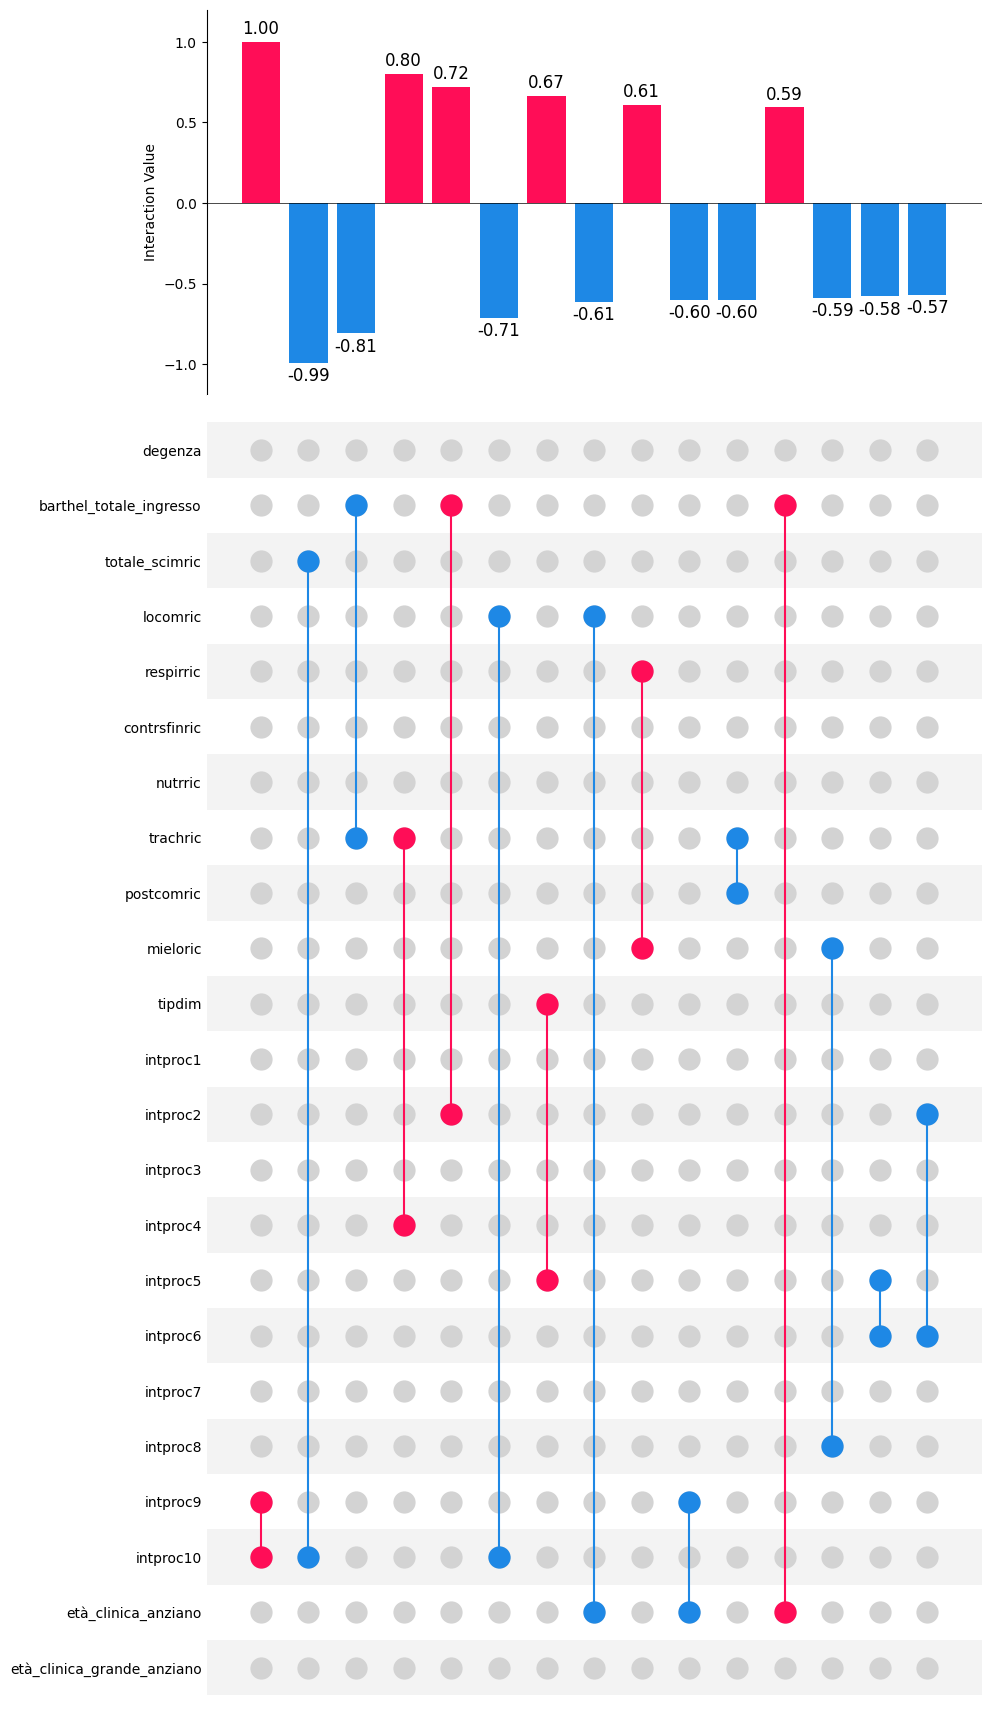

In [17]:
# 📦 Librerie
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score
from shapiq import TabularExplainer

# 📥 Dataset
df = pd.read_parquet("../data/processed/RM_Dimessi_clean.parquet")

# 🧮 Variabili target e features
df["barthel_totale_ingresso"] = df[[f"bartric{i}" for i in range(1, 12)]].sum(axis=1)
df["barthel_totale_dimissione"] = df[[f"bartdim{i}" for i in range(1, 12)]].sum(axis=1)
df["delta_barthel"] = df["barthel_totale_dimissione"] - df["barthel_totale_ingresso"]

# 🧼 Pulizia
df = df.dropna(subset=["delta_barthel"])
df = df[(df["delta_barthel"] > -50) & (df["delta_barthel"] < 100)]
df = df[df["degenza"] < 180]
df["età_clinica"] = df["età del paziente dimesso"].apply(
    lambda x: "adulto" if x < 65 else "anziano" if x < 80 else "grande_anziano"
)

# 🎯 Features
feature_cols = [
    "degenza", "barthel_totale_ingresso", "età_clinica",
    "totale_drsric", "gosric", "lcfric", "totale_scimric",
    "locomric", "respirric", "contrsfinric", "nutrric", "trachric",
    "postcomric", "mieloric", "ASIAric", "tipdim",
    "intproc1", "intproc2", "intproc3", "intproc4", "intproc5",
    "intproc6", "intproc7", "intproc8", "intproc9", "intproc10"
]

X_raw = df[feature_cols].copy()
y = df["delta_barthel"].copy()

# 🔧 Imputazione & Encoding
num_cols = X_raw.select_dtypes(include=["number"]).columns
cat_cols = X_raw.select_dtypes(include=["object", "category", "bool"]).columns
num_cols_valid = [col for col in num_cols if X_raw[col].notna().sum() > 0]

X_num = pd.DataFrame(
    SimpleImputer(strategy="median").fit_transform(X_raw[num_cols_valid]),
    columns=num_cols_valid
)

X_cat = pd.DataFrame(
    SimpleImputer(strategy="constant", fill_value="missing").fit_transform(X_raw[cat_cols]),
    columns=cat_cols
)

X = pd.get_dummies(pd.concat([X_num, X_cat], axis=1), drop_first=True)

# 🔀 Split
X_np, y_np = X.to_numpy(), y.to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X_np, y_np, test_size=0.2, random_state=42)

# 🚀 Model
model = XGBRegressor(random_state=42, max_depth=4, n_estimators=50)
model.fit(X_train, y_train)

# 📊 Metrics
print("📏 MSE:", mean_squared_error(y_test, model.predict(X_test)))
print("📈 R²:", r2_score(y_test, model.predict(X_test)))

# 🔍 SHAPIQ - interazione su un singolo paziente
x_explain = X_test[2]
explainer = TabularExplainer(model, data=X_train, index="FSII", max_order=2, random_state=42)

explanation = explainer.explain(x_explain, budget=256)

# (facoltativo) normalizzazione
explanation.values = explanation.values / np.max(np.abs(explanation.values))

# (facoltativo) nomi feature leggibili
explanation.feature_names = list(X.columns)

# 📈 Plot
explanation.plot_upset(color_matrix=True,  feature_names=feature_names, n_interactions=15)

🧠 Struttura del grafico
🔷 Parte superiore: Barre con valori
Asse Y = valore di interazione (positivo o negativo).

Barre rosse = set di feature che aumentano il delta Barthel → associate a maggiore recupero.

Barre blu = set di feature che diminuiscono il delta Barthel → associate a minore recupero o peggioramento.

Ogni barra rappresenta:

Una combinazione di 1 o 2 feature.

L’importanza media stimata di quella combinazione nel contribuire alla predizione per il paziente selezionato (X_test[2]).

Il numero sopra la barra è il valore (normalizzato) di impatto.

👉 Esempio:

barthel_totale_ingresso da sola ha valore 1.00 → massimo impatto positivo per quel soggetto.

totale_scimric + locomric hanno valore -0.81 → impatto fortemente negativo se combinate.

🧩 Parte inferiore: griglia UpSet
Questa è una matrice di incrocio tra feature:

Righe = feature del modello (intproc3, degenza, età_clinica_anziano, ecc.).

Colonne = ciascuna delle combinazioni di feature rappresentate sopra (ordinate da sinistra a destra).

I punti neri collegati con la linea verticale mostrano quali feature compongono ogni set.

👉 Ad esempio:

La terza barra da sinistra è una combinazione tra barthel_totale_ingresso e intproc1, perché hanno entrambi il punto nero su quella colonna.

💡 Interpretazione clinica (esempio)
Il modello ha stimato che per il paziente X_test[2], avere:

Un basso punteggio di ingresso (barthel_totale_ingresso) ha il maggiore impatto positivo sul delta → forse perché c’è più margine di miglioramento.

La combinazione di totale_scimric e locomric ha impatto negativo → soggetto con compromissione locomotoria + disabilità alta secondo SCIM ha meno beneficio riabilitativo.

L’interazione intproc2 + tipdim ha valore positivo → alcuni tipi di dimissione e interventi riabilitativi sono associati a outcome migliori.

📈 Perché è potente questo grafico
Non guarda solo all’effetto singolo delle feature (come lo SHAP bar plot), ma analizza l’effetto combinato (set di 2 o più).

Può evidenziare interazioni non lineari rilevanti, spesso invisibili nei metodi standard.